In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
% matplotlib inline

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [3]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [4]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [5]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

### linear regression with SGD

<pre>
y_hat = b0 + b1 * x # which is same as y = mx + c. Here c is b0 and m is b1

error = y - y_hat
b = b - learning_rate * error * x # update b till it converges.
</pre>

In [6]:
NO_OF_EPOCHS = 10000
b0 = 0
b1 = 0
LEARNING_RATE = 0.005

for idx in range(NO_OF_EPOCHS):
    sum_error = 0
    for x_i, y_i in zip(diabetes_X_train, diabetes_y_train):
        y_hat = b0 + b1 * x_i
        error = y_hat - y_i 
        b0 = b0 - LEARNING_RATE * error
        b1 = b1 - LEARNING_RATE * error * x_i
        sum_error += error**2
    if idx % 1000 == 0:
        print('epoch=%d, error=%.3f, coef_0=%.3f, coef_1=%.3f' % (idx, sum_error, b0, b1))

epoch=0, error=9202858.740, coef_0=53.119, coef_1=0.896
epoch=1000, error=1795114.109, coef_0=153.690, coef_1=577.693
epoch=2000, error=1689109.439, coef_0=153.479, coef_1=799.401
epoch=3000, error=1673408.970, coef_0=153.399, coef_1=884.620
epoch=4000, error=1671074.412, coef_0=153.367, coef_1=917.377
epoch=5000, error=1670723.772, coef_0=153.356, coef_1=929.968
epoch=6000, error=1670669.768, coef_0=153.351, coef_1=934.807
epoch=7000, error=1670660.945, coef_0=153.349, coef_1=936.667
epoch=8000, error=1670659.316, coef_0=153.348, coef_1=937.383
epoch=9000, error=1670658.951, coef_0=153.348, coef_1=937.657


In [7]:
print('coefs', b0, b1)

coefs [153.34813108] [937.76295488]


In [8]:
y_pred = diabetes_X_test * b1 + b0

In [9]:
sse = 0
for y_p, y_o in zip(y_pred, diabetes_y_test):
    sse += (y_p - y_o) ** 2

In [10]:
mse = sse/len(y_pred)

In [11]:
mse

array([2563.69453063])

([], <a list of 0 Text yticklabel objects>)

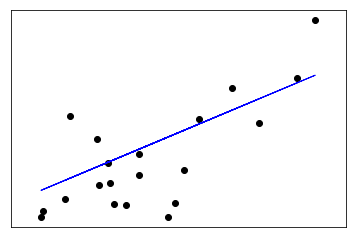

In [12]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

## Validate our model with the sklearn package.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


/Users/viki/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


([], <a list of 0 Text yticklabel objects>)

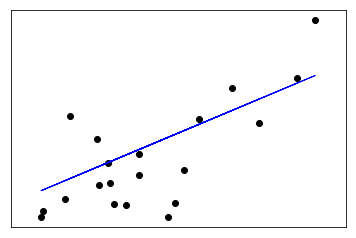

In [13]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())